# Linear Models of Classifcation

#### Logistic Regresion and LinearSVC

In [1]:
def intro():
    '''
        For linear models for classification,
        the decision boundary is a linear function of the input. In other words, a (binary) linear 
        classifier is a classifier that separates two classes using a line, a plane, or a hyper‐
        plane. We will see examples of that in this section.
    '''
print(intro.__doc__)


        For linear models for classification,
        the decision boundary is a linear function of the input. In other words, a (binary) linear 
        classifier is a classifier that separates two classes using a line, a plane, or a hyper‐
        plane. We will see examples of that in this section.
    


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt
import numpy as np

/home/aditya/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/aditya/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



    In this figure, we have the first feature of the forge dataset on the x-axis and the second 
    feature on the y-axis, as before. We display the decision boundaries found by
    LinearSVC and LogisticRegression respectively as straight lines, separating the area
    classified as class 1 on the top from the area classified as class 0 on the bottom. In
    other words, any new data point that lies above the black line will be classified as class
    1 by the respective classifier, while any point that lies below the black line will be classified as class 0

    The two models come up with similar decision boundaries. Note that both misclassify two of the points. 
    By default, both models apply an L2 regularization, in the same way that Ridge does for regression



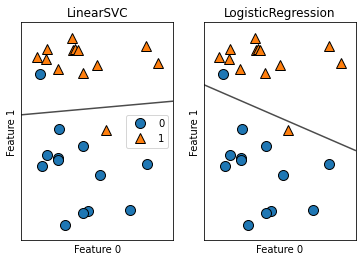

In [14]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2)

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

'''
    In this figure, we have the first feature of the forge dataset on the x-axis and the second 
    feature on the y-axis, as before. We display the decision boundaries found by
    LinearSVC and LogisticRegression respectively as straight lines, separating the area
    classified as class 1 on the top from the area classified as class 0 on the bottom. In
    other words, any new data point that lies above the black line will be classified as class
    1 by the respective classifier, while any point that lies below the black line will be classified as class 0

    The two models come up with similar decision boundaries. Note that both misclassify two of the points. 
    By default, both models apply an L2 regularization, in the same way that Ridge does for regression
'''
print(__doc__)


        For LogisticRegression and LinearSVC the trade-off parameter that determines the
        strength of the regularization is called C, and higher values of C correspond to less
        regularization. In other words, when you use a high value for the parameter C, LogisticRegression 
        and LinearSVC try to fit the training set as best as possible, while with
        low values of the parameter C, the models put more emphasis on finding a coefficient
        vector (w) that is close to zero.
        
        There is another interesting aspect of how the parameter C acts. Using low values of C
        will cause the algorithms to try to adjust to the “majority” of data points, while using
        a higher value of C stresses the importance that each individual data point be classified correctly. 
        Here is an illustration using LinearSVC
    


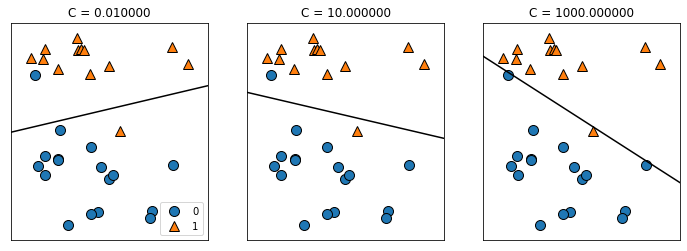

In [17]:
mglearn.plots.plot_linear_svc_regularization()

def notes():
    '''
        For LogisticRegression and LinearSVC the trade-off parameter that determines the
        strength of the regularization is called C, and higher values of C correspond to less
        regularization. In other words, when you use a high value for the parameter C, LogisticRegression 
        and LinearSVC try to fit the training set as best as possible, while with
        low values of the parameter C, the models put more emphasis on finding a coefficient
        vector (w) that is close to zero.
        
        There is another interesting aspect of how the parameter C acts. Using low values of C
        will cause the algorithms to try to adjust to the “majority” of data points, while using
        a higher value of C stresses the importance that each individual data point be classified correctly. 
        Here is an illustration using LinearSVC
    '''
print(notes.__doc__)

In [56]:
# Breast cancer dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set:{:.3f}".format(logreg.score(X_train, y_train)))
print("Testing set:{:.3f}".format(logreg.score(X_test, y_test)))

Training set:0.947
Testing set:0.857


In [57]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Testing set:{:.3f}".format(logreg100.score(X_test, y_test)))

Training set:1.000
Testing set:0.857


In [58]:
logreg01 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set:{:.3f}".format(logreg01.score(X_train, y_train)))
print("Testing set:{:.3f}".format(logreg01.score(X_test, y_test)))

Training set:0.632
Testing set:0.143


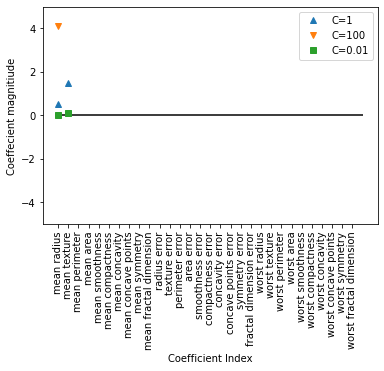

In [59]:
plt.plot(logreg.coef_.T, '^', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=100")
plt.plot(logreg01.coef_.T, 's', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])

plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coeffecient magnitiude")
plt.legend()

Training set for l1 logreg with C=0.010: 0.63
Testing set for l1 logreg with C=0.010: 0.14
Training set for l1 logreg with C=1.000: 0.95
Testing set for l1 logreg with C=1.000: 0.86
Training set for l1 logreg with C=100.000: 0.95
Testing set for l1 logreg with C=100.000: 0.86


/home/aditya/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/aditya/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


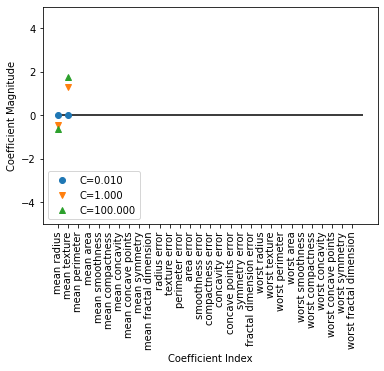

In [75]:
for C, marker in zip([0.01, 1, 100], ['o', 'v', '^']):
    lr_l1 = LogisticRegression(C=C, solver="saga", penalty='l1').fit(X_train, y_train)
    print("Training set for l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Testing set for l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)

### Multilclass classification

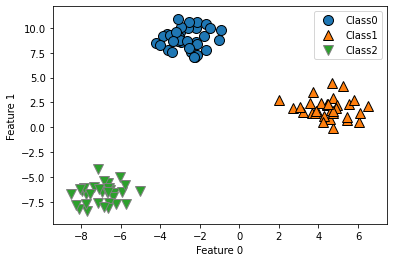

In [113]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class0", "Class1", "Class2"])

In [111]:
liner_svm = LinearSVC().fit(X, y)
print("Coefficient shape:", liner_svm.coef_.shape)
print("Intercept shape:", liner_svm.intercept_.shape)
print("\n{}".format(liner_svm.coef_))
#liner_svm.intercept_
l = np.linspace(-15,15,num=20,axis=0,endpoint=True)
#r = -(l*liner_svm.coef_[0] + liner_svm.intercept_)/liner_svm.coef_[1]
X[:,1]

Coefficient shape: (3, 2)
Intercept shape: (3,)

[[-0.17492215  0.23140686]
 [ 0.47621398 -0.06937424]
 [-0.18914205 -0.20399669]]


array([-8.39495682,  0.74230537,  9.55684617,  0.57131862, -6.31932507,
        1.40687195,  9.98983126,  2.33028226,  2.94181467,  9.38998415,
        9.12520872, -5.57296684, -6.58312492,  7.8180795 ,  9.18565441,
       -6.39763718, -6.05292634, 10.01781903, -6.72638449, -6.95293851,
        8.54855637, -6.53895762, -6.0237108 , 10.55232269, 10.57892978,
       10.07140835,  1.55252436, -7.73726715, -6.09302499, -8.20056621,
       -6.6478559 ,  2.23422496,  2.27471703, -7.70079191,  9.78172086,
        8.72259238,  7.58953794,  8.62920385,  2.30192079, -0.01439923,
       -7.81793463,  8.82862715,  0.80449165,  9.21114736,  8.71318243,
        2.44676211, -6.69547573, -6.49479221, -5.42657552,  1.47141264,
        2.79507219,  1.73858255, 10.37052616, -6.09828672, -4.98331661,
       -6.1661091 ,  9.32853346,  7.10100588,  1.45489947,  8.4519986 ,
       -7.59446101,  1.64550754, -7.63384576,  1.94665581, -4.15994043,
       -8.12584837,  4.4364118 , -7.69591988,  2.48643712,  1.89

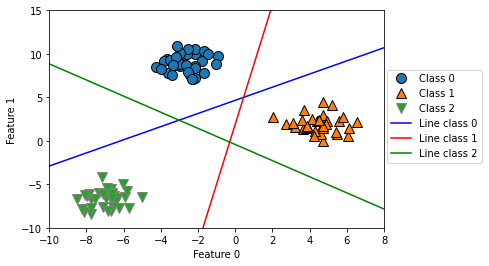

In [107]:
# (line*coef[0] + intercept)/coef[1] -> classification confidence formula
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15,num=100,endpoint=True)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01,0.3))

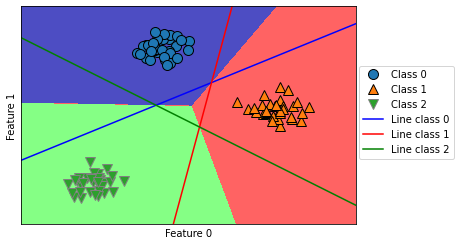

In [116]:
mglearn.plots.plot_2d_classification(liner_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01,0.3))

### Naive Bayes Classifier

In [130]:
def introduction():
    '''
        The price paid for this efficiency is that naive Bayes models often provide
        generalization performance that is slightly worse than that of linear classifiers like
        LogisticRegression and LinearSVC.
        
        The reason that naive Bayes models are so efficient is that they learn parameters by
        looking at each feature individually and collect simple per-class statistics from each
        feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn: 
        GaussianNB, BernoulliNB, and MultinomialNB. GaussianNB can be applied to any continuous data, 
        while BernoulliNB assumes binary data and MultinomialNB assumes count data 
        (that is, that each feature represents an integer count of something, like how often a word 
        appears in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification.
    '''
print(introduction.__doc__)


        The price paid for this efficiency is that naive Bayes models often provide
        generalization performance that is slightly worse than that of linear classifiers like
        LogisticRegression and LinearSVC.
        
        The reason that naive Bayes models are so efficient is that they learn parameters by
        looking at each feature individually and collect simple per-class statistics from each
        feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn: 
        GaussianNB, BernoulliNB, and MultinomialNB. GaussianNB can be applied to any continuous data, 
        while BernoulliNB assumes binary data and MultinomialNB assumes count data 
        (that is, that each feature represents an integer count of something, like how often a word 
        appears in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification.
    


In [175]:
X = np.array([[0, 1, 0, 1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0, 1, 0]])


y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [176]:
X.cumsum()

array([0, 1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 6, 7, 7, 8, 8])

In [181]:
X.argsort(axis=0)
#print(np.argsort.__doc__)

array([[0, 1, 0, 3],
       [2, 2, 2, 0],
       [1, 3, 1, 1],
       [3, 0, 3, 2]])

### Decision Tree 

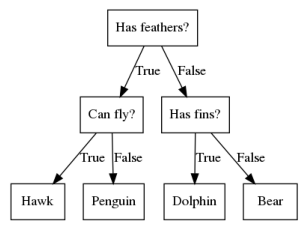

In [182]:
mglearn.plots.plot_animal_tree()

In [184]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.937


In [187]:
'''
    If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
    and complex. Unpruned trees are therefore prone to overfitting and not generalizing
    well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
    the tree before we perfectly fit to the training data. One option is to stop building the
    tree after a certain depth has been reached. Here we set max_depth=4, meaning only
    four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. 
    This leads to a lower accuracy on the training set, but an improvement on the test set:
'''
print(__doc__)


    If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
    and complex. Unpruned trees are therefore prone to overfitting and not generalizing
    well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
    the tree before we perfectly fit to the training data. One option is to stop building the
    tree after a certain depth has been reached. Here we set max_depth=4, meaning only
    four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. 
    This leads to a lower accuracy on the training set, but an improvement on the test set:



In [185]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on testing set: 0.951


#### Analyzing tree visually

In [188]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['maligant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

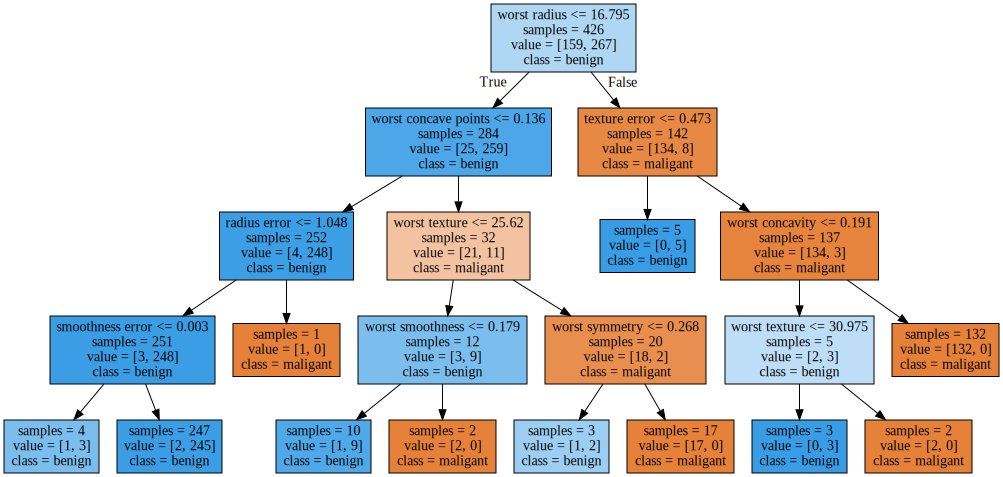

In [189]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Feature Importance

In [193]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


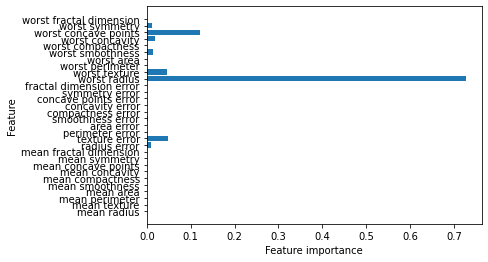

In [197]:
def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importance(tree)

Feature importances: [0. 1.]


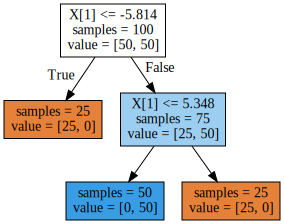


    The plot shows a dataset with two features and two classes. Here, all the information
    is contained in X[1], and X[0] is not used at all. But the relation between X[1] and  
    the output class is not monotonous, meaning we cannot say “a high value of X[0]



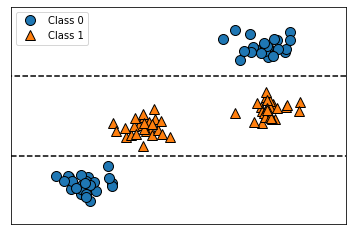

In [201]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

'''
    The plot shows a dataset with two features and two classes. Here, all the information
    is contained in X[1], and X[0] is not used at all. But the relation between X[1] and  
    the output class is not monotonous, meaning we cannot say “a high value of X[0]
'''
print(__doc__)

Text(0, 0.5, 'Price in $/Mbyte')

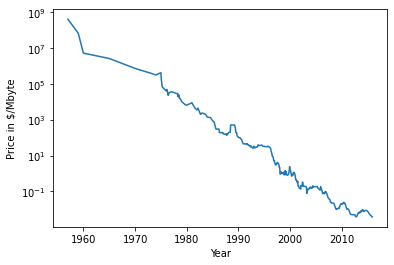

In [205]:
import pandas as pd
ram_prices = pd.read_csv("/home/aditya/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f04b3450ac8>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f04b3115550>, <matplotlib.lines.Line2D object at 0x7f04b3115048>, <matplotlib.lines.Line2D object at 0x7f04b31125f8>, <matplotlib.lines.Line2D object at 0x7f04b3125940>], 'caps': [<matplotlib.lines.Line2D object at 0x7f04b318d748>, <matplotlib.lines.Line2D object at 0x7f04b318de48>, <matplotlib.lines.Line2D object at 0x7f04b31254a8>, <matplotlib.lines.Line2D object at 0x7f04b3125c18>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f04b3115898>, <matplotlib.lines.Line2D object at 0x7f04b3112a90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f04b318db70>, <matplotlib.lines.Line2D object at 0x7f04b3125668>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f04b3112080>, <matplotlib.lines.Line2D object at 0x7f04b31adda0>], 'means': []})

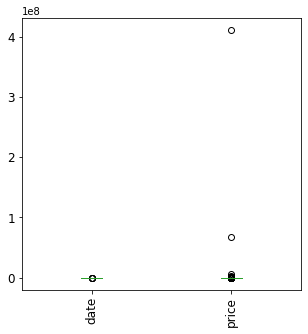

In [225]:
ram_prices.boxplot(column=["date", "price"], fontsize='large', rot='90', grid=False, figsize=(5,5),
                  return_type='both')

### Comparision between DecisionTreeRegressor and LinearRegression

In [241]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical date to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict price based on date
X_train = data_train.date[:, np.newaxis]
# we use a log transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#undo log transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

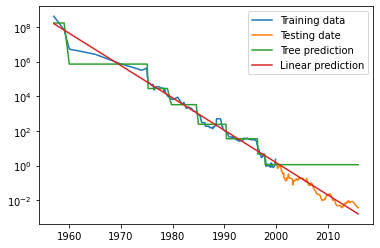

In [242]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Testing date")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [261]:
def advantages_tree():
    '''
        Decision trees have two advantages over many of the algorithms we’ve discussed so
        far: the resulting model can easily be visualized and understood by nonexperts (at
        least for smaller trees), and the algorithms are completely invariant to scaling of the
        data. As each feature is processed separately, and the possible splits of the data don’t
        depend on scaling, no preprocessing like normalization or standardization of features
        is needed for decision tree algorithms. In particular, decision trees work well when
        you have features that are on completely different scales, or a mix of binary and continuous features.
    '''
def ending_notes():
    '''
        the parameters that control model complexity in decision trees
        are the pre-pruning parameters that stop the building of the tree before it is fully
        developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, 
        or min_samples_leaf—is sufficient to prevent overfitting.
    '''
print(ending_notes.__doc__)
print(advantages_tree.__doc__)


        the parameters that control model complexity in decision trees
        are the pre-pruning parameters that stop the building of the tree before it is fully
        developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, 
        or min_samples_leaf—is sufficient to prevent overfitting.
    

        Decision trees have two advantages over many of the algorithms we’ve discussed so
        far: the resulting model can easily be visualized and understood by nonexperts (at
        least for smaller trees), and the algorithms are completely invariant to scaling of the
        data. As each feature is processed separately, and the possible splits of the data don’t
        depend on scaling, no preprocessing like normalization or standardization of features
        is needed for decision tree algorithms. In particular, decision trees work well when
        you have features that are on completely different scales, or a mix of binary and